In [167]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [168]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

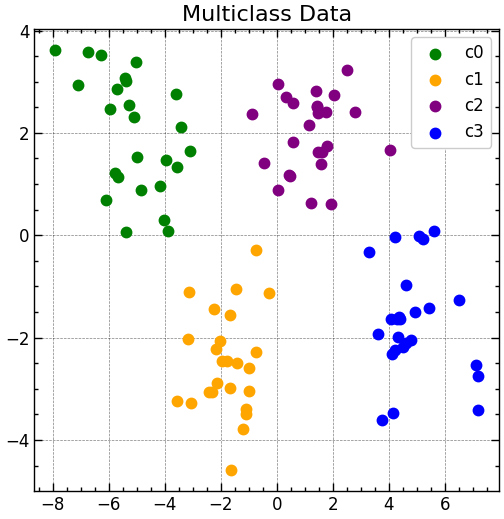

In [169]:
def plot_data(ax, title : str = "SPN"):
    ax.tick_params(axis="both", labelsize=12)
    ax.set_title(title)
    colors = ['green', 'orange', 'purple', 'blue']
    for i in range(classes):
        ax.scatter(X_train[y_train==i][:, 0], X_train[y_train==i][:, 1], color=colors[i], label=f"c{i}", lw=2.5)
    ax.legend(fontsize=12)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_data(ax, "Multiclass Data")

In [170]:
model = Sequential([
    Dense(units=2, activation="relu"),
    Dense(units=4, activation="linear")
])
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.01))

In [171]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6552  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.5077  
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.3955  
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2666 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 1.1807
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0665 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.9554
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.9312 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8446 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8000 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7630 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7690 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6955 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7115 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.6706
Epoch 16/200
4

In [172]:
x1_sample = np.linspace(-10, 8, 25)
x2_sample = np.linspace(-6, 4, 25)

x1, x2 = np.meshgrid(x1_sample, x2_sample)
y_grid = np.zeros_like(x1)
for i in range(y_grid.shape[0]):
    for j in range(y_grid[0].shape[0]):
        result = tf.nn.softmax(model.predict(np.array([[x1[i][j], x2[i][j]]])))
        y_grid[i][j] = np.where(result == np.max(result))[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\inven\AppData\Local\Temp\ipykernel_16268\2775357822.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_grid[i][j] = np.where(result == np.max(result))[1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

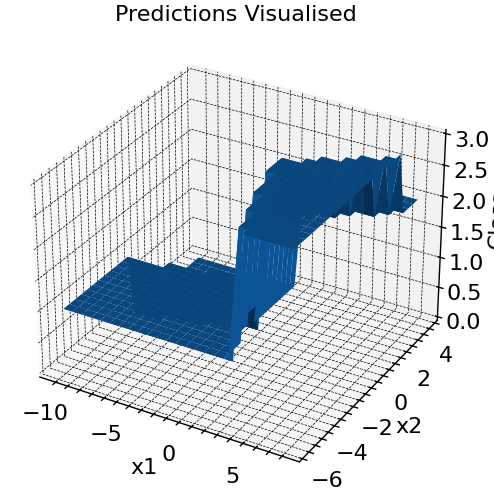

In [173]:
fig, axes = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
axes.set_title("Predictions Visualised")
axes.plot_surface(x1, x2, y_grid)
axes.set_xlabel("x1")
axes.set_ylabel("x2")
axes.set_zlabel("Class")
fig.savefig("./predictions", dpi=300)

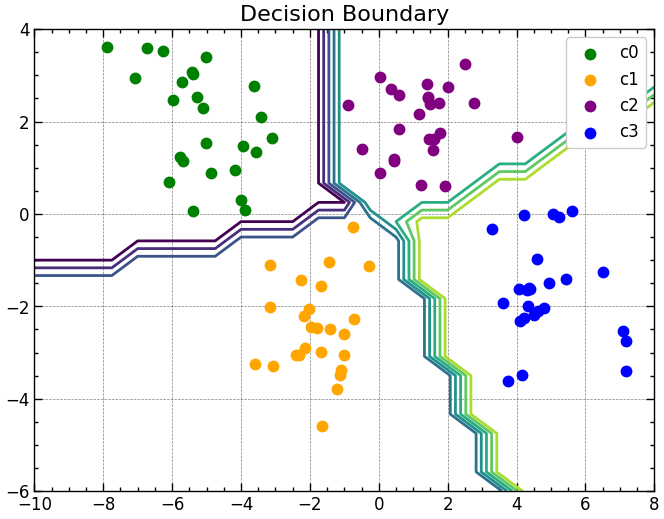

In [174]:
fig, ax = plt.subplots(1, 1)
ax.contour(x1, x2, y_grid)
plot_data(ax, "Decision Boundary")
fig.savefig("./decisionBoundary", dpi=300)

In [175]:
layer1weights = model.get_layer(index=0).get_weights()

In [176]:
x1_sample = np.linspace(-10, 8, 50)
x2_sample = np.linspace(-6, 4, 50)

x1, x2 = np.meshgrid(x1_sample, x2_sample)

w1_1 = layer1weights[0][:, 0]
b1_1 = layer1weights[1][0]
w2_1 = layer1weights[0][:, 1]
b2_1 = layer1weights[1][1]

y1_1_grid = np.zeros_like(x1)
y2_1_grid = np.zeros_like(x1)

for i in range(y1_1_grid.shape[0]):
    for j in range(y1_1_grid[0].shape[0]):
        current_data = np.r_[x1[i][j], x2[i][j]]
        z1_1 = np.dot(w1_1, current_data) + b1_1
        y1_1_grid[i][j] = np.maximum(0, z1_1)
        z2_1 = np.dot(w2_1, current_data) + b2_1
        y2_1_grid[i][j] = np.maximum(0, z2_1)


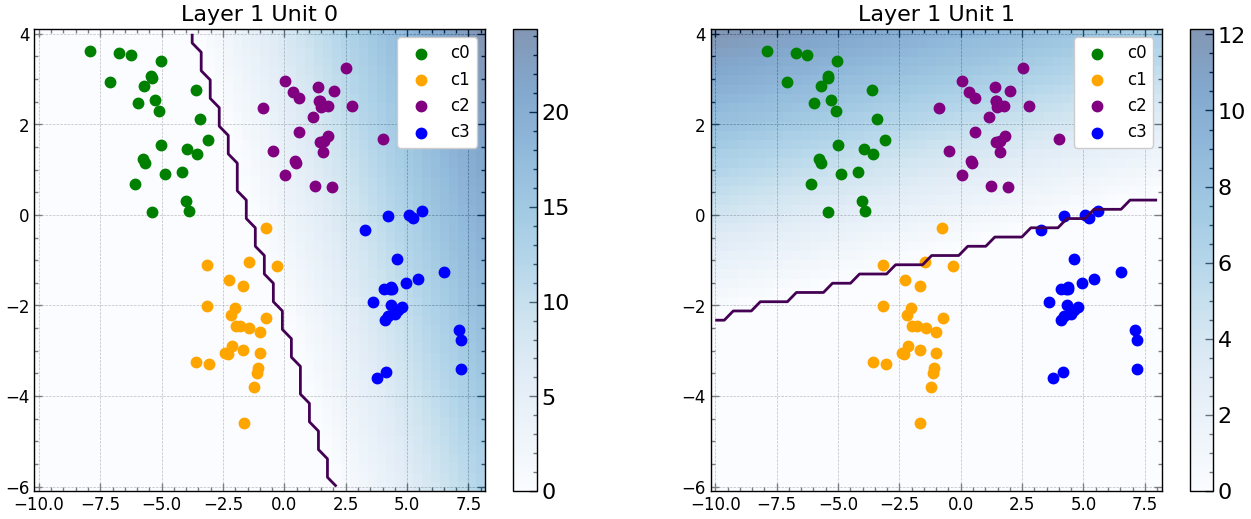

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax = axes[0]
ax.contour(x1, x2, y1_1_grid, 0)
c = ax.pcolormesh(x1, x2, y1_1_grid, cmap="Blues", alpha=0.5)
plot_data(ax, "Layer 1 Unit 0")
fig.colorbar(c)
ax = axes[1]
c = ax.pcolormesh(x1, x2, y2_1_grid,  cmap="Blues", alpha=0.5)
ax.contour(x1, x2, y2_1_grid, 0)
fig.colorbar(c)
plot_data(ax, "Layer 1 Unit 1")
fig.savefig("./Layer1Output", dpi=300)

In [178]:
layer2weights = model.get_layer(index=1).get_weights()

In [179]:
layer2weights

[array([[-2.588402  , -1.2456062 , -0.2657124 ,  0.30368677],
        [ 1.1879829 , -1.7244697 ,  0.19194515, -3.0557055 ]],
       dtype=float32),
 array([-1.3037399,  3.2311375, -1.2585173, -1.5533286], dtype=float32)]

In [180]:
a0_1 = np.linspace(0, 20, 100)
a1_1 = np.linspace(0, 25, 100)

a0_1, a1_1 = np.meshgrid(a0_1, a1_1)

y0_2 = np.zeros_like(a0_1)
y1_2 = np.zeros_like(a0_1)
y2_2 = np.zeros_like(a0_1)
y3_2 = np.zeros_like(a0_1)


for i in range(a0_1.shape[0]):
    for j in range(a0_1[0].shape[0]):
        current_data = np.c_[a0_1[i][j], a1_1[i][j]]
        z0_2 = np.dot(current_data, layer2weights[0][:, 0]) + layer2weights[1][0]
        z1_2 = np.dot(current_data, layer2weights[0][:, 1]) + layer2weights[1][1]
        z2_2 = np.dot(current_data, layer2weights[0][:, 2]) + layer2weights[1][2]
        z3_2 = np.dot(current_data, layer2weights[0][:, 3]) + layer2weights[1][3]
        y0_2[i][j] = z0_2
        y1_2[i][j] = z1_2
        y2_2[i][j] = z2_2
        y3_2[i][j] = z3_2

C:\Users\inven\AppData\Local\Temp\ipykernel_16268\348313592.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_2[i][j] = z0_2
C:\Users\inven\AppData\Local\Temp\ipykernel_16268\348313592.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1_2[i][j] = z1_2
C:\Users\inven\AppData\Local\Temp\ipykernel_16268\348313592.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2_2[i][j] = z2_2
C:\Users\inven\AppData\Local\Temp\ipykernel_16268\348313592.py:22: Deprecati

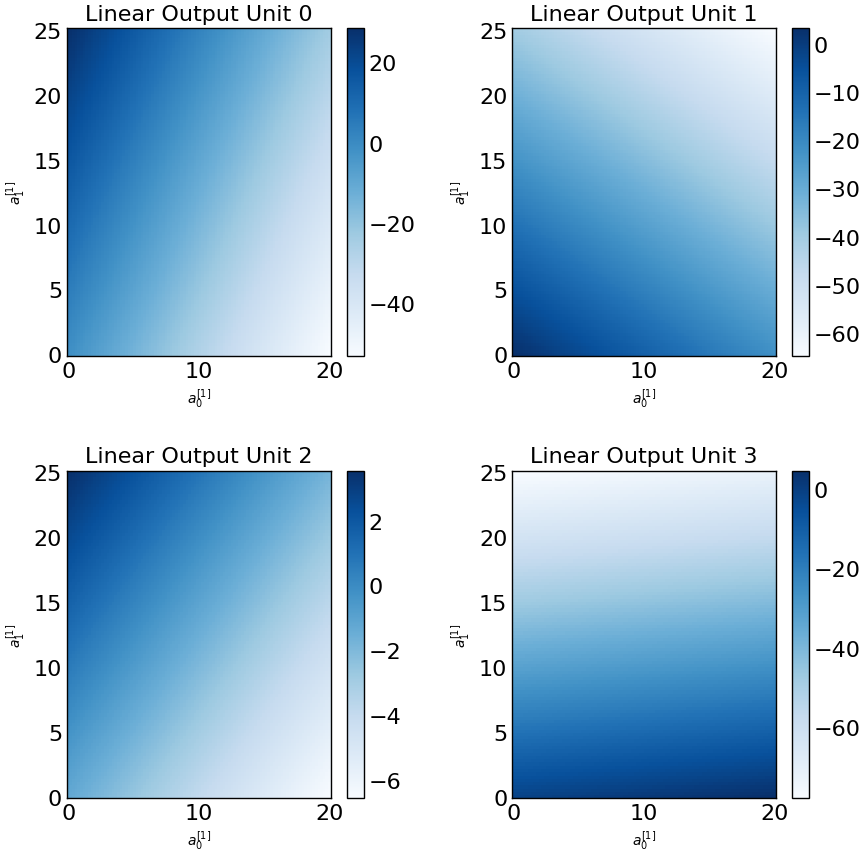

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.35, wspace=0.35)
unit_index = 0
c = axes[0][0].pcolormesh(a0_1, a1_1, y0_2, cmap="Blues", alpha=1)
fig.colorbar(c)
c = axes[0][1].pcolormesh(a0_1, a1_1, y1_2, cmap="Blues", alpha=1)
fig.colorbar(c)
c = axes[1][0].pcolormesh(a0_1, a1_1, y2_2, cmap="Blues", alpha=1)
fig.colorbar(c)
c = axes[1][1].pcolormesh(a0_1, a1_1, y3_2, cmap="Blues", alpha=1)
fig.colorbar(c)
for ax in axes.flat:
    ax.set_title(f"Linear Output Unit {unit_index}")
    ax.set_xlabel(r"$a_0^{[1]}$", fontsize=10)
    ax.set_ylabel(r"$a_1^{[1]}$", fontsize=10)
    unit_index += 1